In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Función para cargar los datos del dataset sin preprocesamiento ni data augmentation
def load_data(dataset_dir):
    images = []  # Lista para almacenar las imágenes
    labels = []  # Lista para almacenar las etiquetas
    classes = sorted(os.listdir(dataset_dir))  # Obtener la lista de clases (nombres de las carpetas)
    
    # Iterar sobre todas las clases
    for i, folder in enumerate(classes):
        folder_path = os.path.join(dataset_dir, folder)  # Ruta a la carpeta de la clase actual
        # Iterar sobre todos los archivos de la carpeta actual
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)  # Ruta a la imagen actual
            image = cv2.imread(image_path)  # Cargar la imagen utilizando OpenCV
            resized_image = cv2.resize(image, (128, 128))  # Redimensionar la imagen a 128x128 píxeles
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Convertir la imagen a escala de grises
            normalized_image = gray_image / 255.0  # Normalizar los valores de píxeles al rango [0, 1]
            images.append(normalized_image)  # Agregar la imagen procesada a la lista de imágenes
            labels.append(i)  # Agregar la etiqueta correspondiente a la lista de etiquetas
    
    images = np.expand_dims(np.array(images), axis=-1)  # Expandir la dimensión de las imágenes para que sean compatibles con el modelo
    labels = np.array(labels)  # Convertir la lista de etiquetas a un array de NumPy
    return images, labels, classes  # Devolver las imágenes, las etiquetas y las clases


In [4]:
# Cargar los datos de entrenamiento y prueba
train_images, train_labels, classes = load_data("d:\\Users\\maris\\Downloads\\archive (2)\\Train_Alphabet")
test_images, test_labels, _ = load_data("d:\\Users\\maris\\Downloads\\archive (2)\\Test_Alphabet")

# Convertir las etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

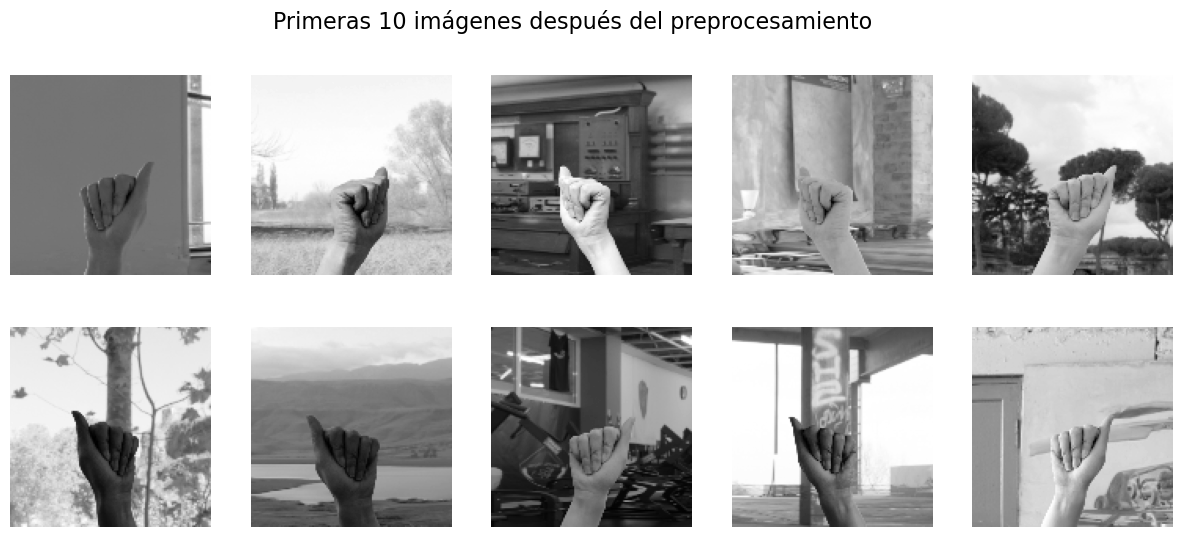

In [5]:
from matplotlib import pyplot as plt
# Mostrar las primeras 10 imágenes después del preprocesamiento
plt.figure(figsize=(15, 6))
plt.suptitle('Primeras 10 imágenes después del preprocesamiento', fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
# Definir la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),  # Capa convolucional con 32 filtros y función de activación ReLU
    MaxPooling2D((2, 2)),  # Capa de agrupamiento (pooling) para reducir la dimensionalidad
    Conv2D(64, (3, 3), activation='relu'),  # Otra capa convolucional con 64 filtros y función de activación ReLU
    MaxPooling2D((2, 2)),  # Otra capa de agrupamiento
    Conv2D(64, (3, 3), activation='relu'),  # Otra capa convolucional
    MaxPooling2D((2, 2)),  # Otra capa de agrupamiento
    Flatten(),  # Aplanar la salida de las capas convolucionales para pasarla a capas densas
    Dropout(0.5),  # Capa de Dropout para regularización (desactivación aleatoria de unidades durante el entrenamiento)
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    Dense(len(classes), activation='softmax')  # Capa de salida con una neurona por clase y función de activación Softmax
])


C:\Users\maris\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

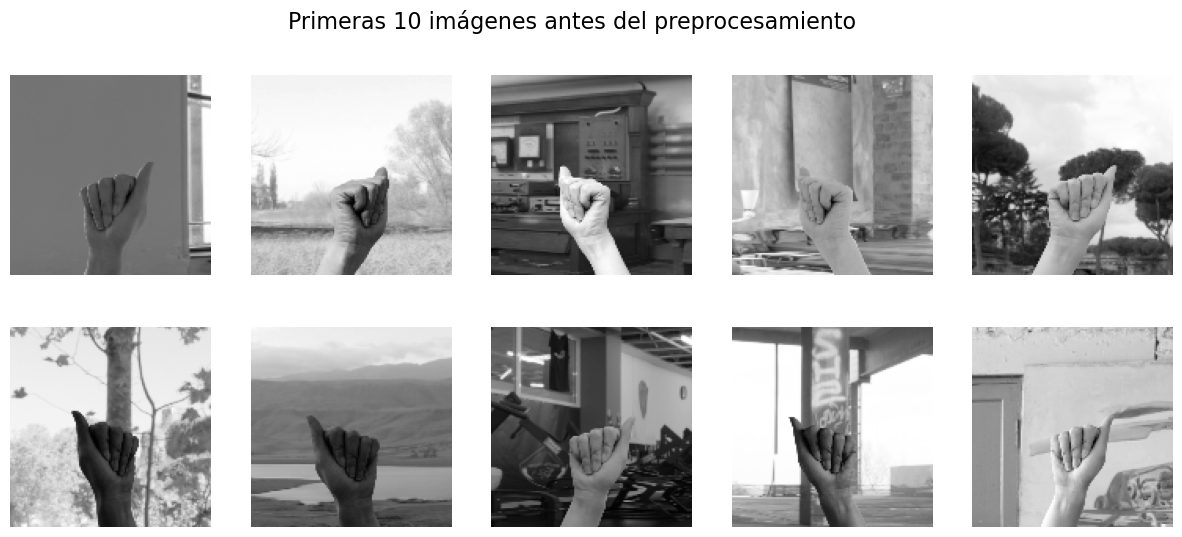

In [10]:
####################### IMPLEMENTAR LUEGO
# Mostrar las primeras 10 imágenes antes del preprocesamiento
plt.figure(figsize=(15,6))
plt.suptitle('Primeras 10 imágenes antes del preprocesamiento', fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [13]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 127s 160ms/step - accuracy: 0.3508 - loss: 2.2564 - val_accuracy: 0.8967 - val_loss: 0.3347
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 132s 173ms/step - accuracy: 0.9088 - loss: 0.2906 - val_accuracy: 0.9548 - val_loss: 0.1589
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 118s 155ms/step - accuracy: 0.9631 - loss: 0.1245 - val_accuracy: 0.9652 - val_loss: 0.1099
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 119s 156ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9704 - val_loss: 0.0908
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 118s 155ms/step - accuracy: 0.9810 - loss: 0.0570 - val_accuracy: 0.9767 - val_loss: 0.0784
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 118s 155ms/step - accuracy: 0.9845 - loss: 0.0455 - val_accuracy: 0.9722 - val_loss: 0.0898
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 125s 165ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9778 - val_loss: 0.0816
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 119s 157ms/step - accuracy: 0.9895 -

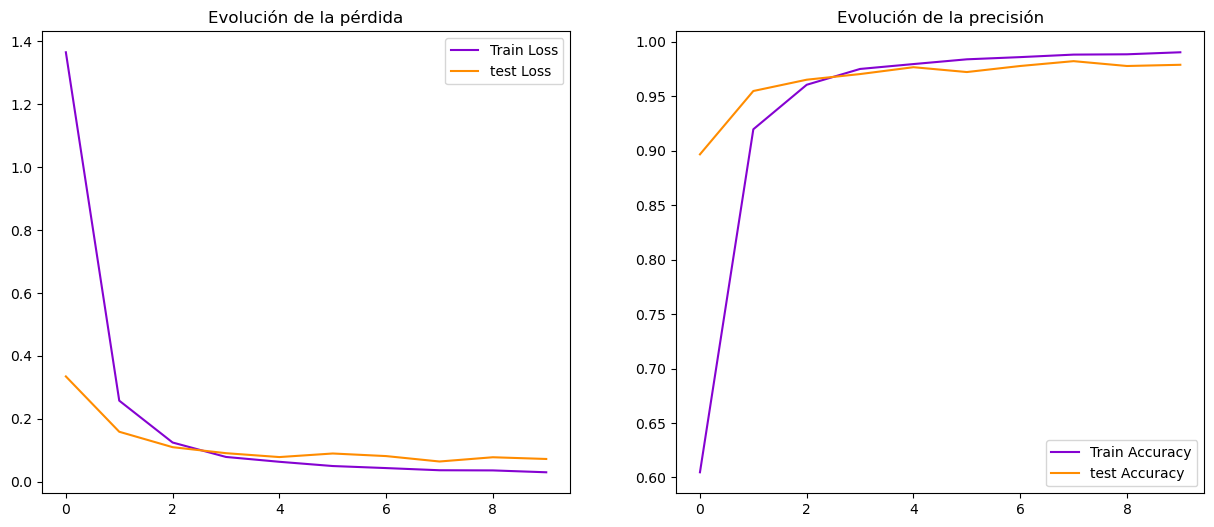

In [14]:
# Visualizar la evolución de la pérdida y la precisión del modelo
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history.history['val_loss'], label='test Loss', color='darkorange')
plt.legend()
plt.title('Evolución de la pérdida')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history.history['val_accuracy'], label='test Accuracy', color='darkorange')
plt.legend()
plt.title('Evolución de la precisión')

plt.show()

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9791 - loss: 0.0801
Test Accuracy: 0.9788888692855835
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


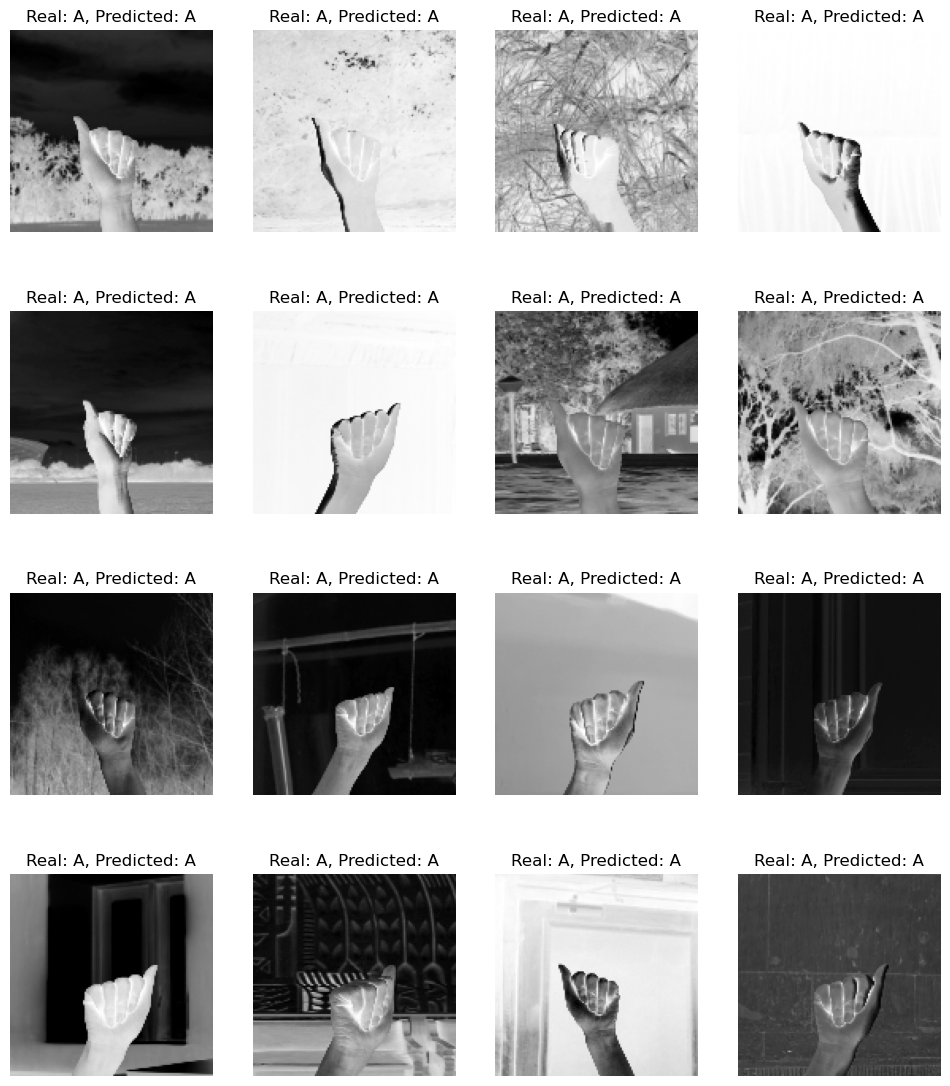

In [15]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

# Mostrar algunas predicciones junto con las imágenes de prueba
predictions = model.predict(test_images)
test_images_reshape = test_images.reshape(test_images.shape[0], 128, 128)

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images_reshape[i], cmap='binary')
    plt.title(f"Real: {classes[np.argmax(test_labels[i])]}, Predicted: {classes[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.show()

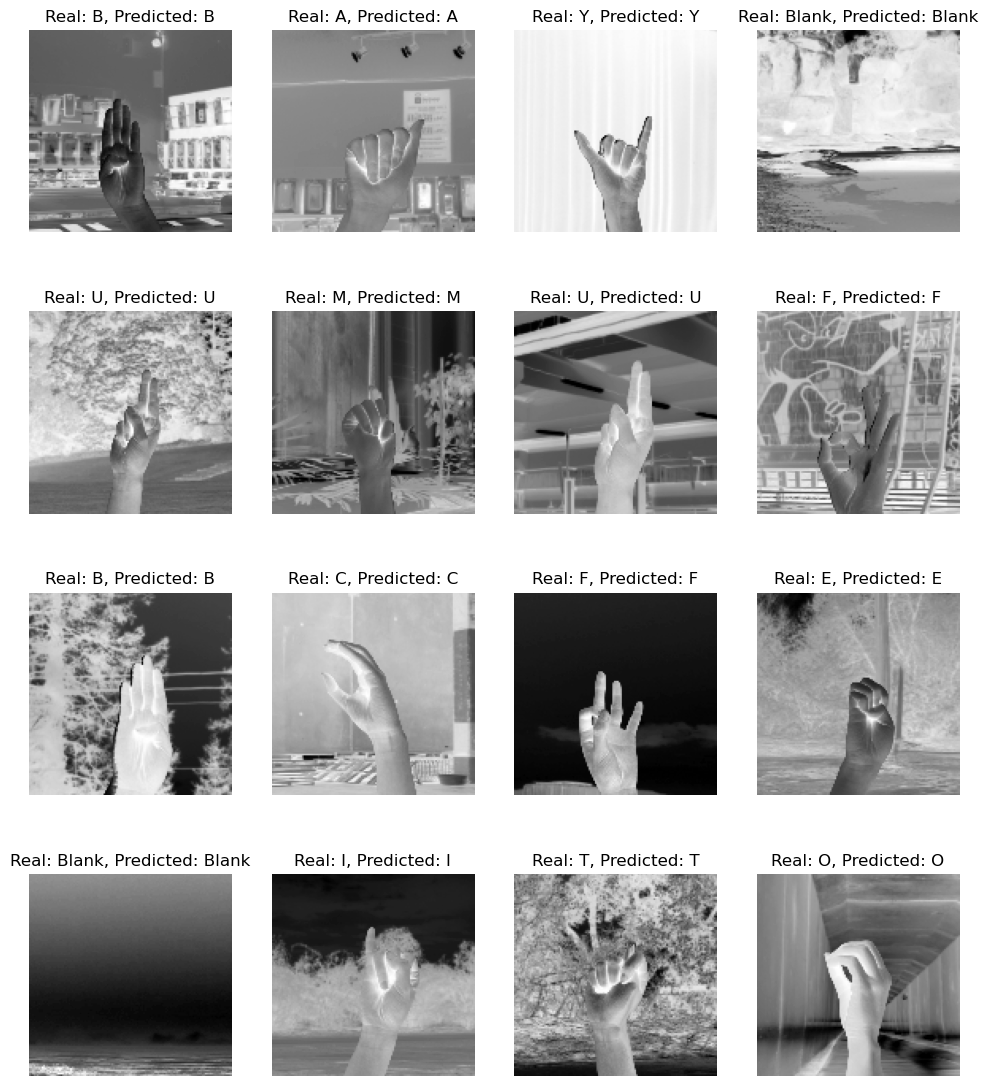

In [23]:
import random

# Seleccionar índices aleatorios para las imágenes de prueba
random_indices = random.sample(range(len(test_images)), 16)

plt.figure(figsize=(12, 14))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images_reshape[idx], cmap='binary')
    plt.title(f"Real: {classes[np.argmax(test_labels[idx])]}, Predicted: {classes[np.argmax(predictions[idx])]}")
    plt.axis('off')

plt.show()


In [ ]:
class cnn_transform(image_preprocessing):
    def __init__(self, image_path, color: str = 'bgr'):
        super().__init__(image_path, color)
        self.image_path = image_path
        self.model = self.build_model()

        # Preprocesamiento
        self.resize_image(128, to_self=True)
        self.segment_image(to_self=True)
        self.to_grayscale(to_self=True)
        
        # Extracción de características con CNN
        self.features = self.extract_features()
        
    def build_model(self):
        class SimpleCNN(nn.Module):
            def __init__(self):
                super(SimpleCNN, self).__init__()
                self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
                self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
                self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
                self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
                self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
                self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
                self.flatten = nn.Flatten()
                self.dropout = nn.Dropout(0.5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                x = self.pool1(x)
                x = F.relu(self.conv2(x))
                x = self.pool2(x)
                x = F.relu(self.conv3(x))
                x = self.pool3(x)
                x = self.flatten(x)
                x = self.dropout(x)
                return x

        model = SimpleCNN()
        return model

    def extract_features(self):
        image_tensor = torch.tensor(self.image, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            features = self.model(image_tensor)
        return features.numpy().flatten()

    def visualize_gradients(self):
        # No se qué parte poner aquí
        pass

    def normalize_cnn(self):
        features_norm = (self.features - np.mean(self.features)) / np.std(self.features)
        return features_norm

    def to_csv(self, normalize: bool = True):
        if normalize:
            feats = [self.image_path.split('/')[-2]] + self.normalize_cnn().tolist()
        else:
            feats = [self.image_path.split('/')[-2]] + self.features.tolist()
        columns = ['letra'] + [f'feature_{i}' for i in range(len(feats)-1)]
        df = pd.DataFrame([feats], columns=columns)
        ruta = venv + r'/cnn-processing/processed_data/{}.csv'.format(self.image_path.split("/")[-3])
        
        df.to_csv(ruta, index=True, mode='a', header=not os.path.exists(ruta))
        
    def extract_values(self, normalize: bool = True):
        if normalize:
            return self.normalize_cnn().tolist()
        else:
            return self.features.tolist()